# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import eig
import seaborn as sns

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

*italicized text*

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [69]:
#set unit vectors
x1= np.array([[1,0]])
x2= np.array([[0,1]])
x3= np.array([[0, 0, 1]])
#seperated x and y scalars
vector= np.array([3, 4])
test_x1= np.array([3, 0])
test_x2= np.array([0, 4])
#finding transformation matrix
p_transformed= np.array([x1+(3*x2),(2*x2)-x1])
#tested tranformation using matrix mul
np.multiply(p_transformed, vector)
test_x1+(3*test_x2), (2*test_x2)- test_x1


(array([ 3, 12]), array([-3,  8]))

In [78]:
x1= np.array([[1,0, 0]])
x2= np.array([[0,1, 0]])
x3= np.array([[0, 0, 1]])
q_transformed= np.array([[(4 * x1)+ x2 + (2 * x3)], [(2 * x2)- x1+ (3 * x3)], [(5*x1)- (2*x3)+ x2]])
q_transformed

v= np.array([2, 4, 5])
v1= np.array([2, 0, 0])
v2= np.array([0, 4, 0])
v3= np.array([0, 0, 5])
v_test= np.array([[(4 * v1)+ v2 + (2* v3)], [(2 * v2)- v1 +(3*v3)], [(5*v1)- (2*v3)+ v2]])
v_check= np.multiply(q_transformed, v)
v_check, v_test

(array([[[[  8,   4,  10]]],
 
 
        [[[ -2,   8,  15]]],
 
 
        [[[ 10,   4, -10]]]]), array([[[  8,   4,  10]],
 
        [[ -2,   8,  15]],
 
        [[ 10,   4, -10]]]))

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.
an eigenvector is the vector in a matrix that does not change direction after being transformed. The eigenvalue tells you how much said vector was squished or scaled

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?
You might not have enough observations to features so it can cause overfitting of the model. Also, having alot of features sometimes means you have redundant features. It can also slow your model down to have to many features that doesn't add much to the overall performance of the model. 

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?
The rule of thumb is 5 times the amount of observations to features

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [178]:
df= pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.species.unique()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[2.93035378e+00, 7.29346400e-16],
       [7.29346400e-16, 9.27403622e-01]])

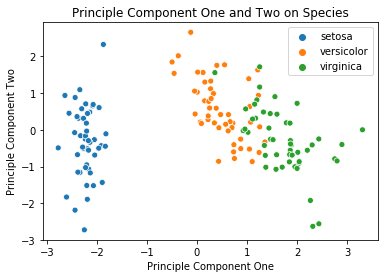

In [249]:
#seperating my features from target
features= df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
target= df.loc[:,'species'].values
#found the means and standard deviations of all my features
seplen_mean= features.T[0].mean()
sepwid_mean= features.T[1].mean()
petlen_mean= features.T[2].mean()
petwid_mean= features.T[3].mean()
seplen_std= features.T[0].std()
sepwid_std= features.T[1].std()
petlen_std= features.T[2].std()
petwid_std= features.T[3].std()
#subtracted all values by their column's mean and then divided them by the column's standard deviation, finished standardizing the data
features.T[0]= (features.T[0]- seplen_mean) / seplen_std
features.T[1]= (features.T[1]- sepwid_mean) / sepwid_std
features.T[2]= (features.T[2]- petlen_mean) / petlen_std
features.T[3]= (features.T[3]- petwid_mean) / petwid_std
#attempted to use the transpose of my columns times the columns to get the var, covar matrix but am unsure if it worked.
var_covar_matrix= np.matmul(features.T, features)
#used np cov to get var-covarience matrix
covarience_matrix= np.cov(features.T)
#passed the covarience matrix into eig function to get the eigen values and their associated eigen vectors
values, vectors= eig(covarience_matrix)
projected = vectors.T.dot(features.T)
values, vectors

principle_component_1= projected[0]
principle_component_2= projected[1]
plt.title('Principle Component One and Two on Species')
plt.xlabel('Principle Component One')
plt.ylabel('Principle Component Two')
sns.scatterplot(x= principle_component_1, y= principle_component_2, hue=target)


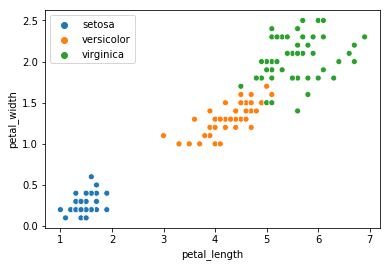

In [252]:
sns.scatterplot(x=df['petal_length'], y= df['petal_width'], hue=target)

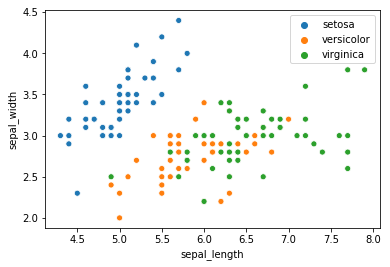

In [253]:
sns.scatterplot(x=df['sepal_length'], y= df['sepal_width'], hue=target)

In [172]:
from sklearn.decomposition import PCA


TypeError: ignored

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)